In [28]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [30]:
from os import listdir
from os.path import isfile, join

In [5]:
#!git clone https://github.com/Marinku099/Sci-project-m5.git

In [31]:
# not sure the real size
width = 450
hieght = 550

In [33]:
df = pd.read_excel(r"data\cdi-data-scan1266.xlsx")
df = df[["ID","Pt","DEP"]] #1 = depressed

In [34]:
df

,ID,Pt,DEP
0,0,5,1
1,1,8,1
2,2,15,0
3,3,8,1
4,4,13,1
...,...,...,...
475,543,23,0
476,544,6,1
477,545,28,0
478,546,13,1


In [35]:
def labelscore(ID):
    i = df['Pt'][df['ID']==ID].index
    score = df.loc[i[0], 'Pt']
    return score

In [37]:
def img2data(path):
  img_data = []
  IDs = []
  scores = []

  for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    for item in tqdm(os.listdir(folder_path)):
      filePath = os.path.join(folder_path, item)

      # print("item is ",item)
      ID = int(item.split('.')[0])
      IDs.append(ID)
      score = labelscore(ID)
      scores.append(score)

      img = cv2.imread(filePath, cv2.IMREAD_GRAYSCALE)
      # plt.imshow(img)

      img = cv2.resize(img , (width, hieght))
      # img.append(score)

      img_data.append(img)

  return img_data, IDs, scores

In [38]:
img, img_name, CDI_score = img2data(r"data_label")
# print(img)

img = np.asarray(img)

flattened_images = img.reshape(img.shape[0], -1)

  5%|▌         | 11/203 [00:00<00:03, 56.03it/s]

100%|██████████| 268/268 [00:03<00:00, 86.50it/s] 


In [47]:
# add score feature
images_score = np.column_stack((flattened_images, CDI_score))
# images_score = flattened_images

In [54]:
images_score

array([[ 0,  0,  0, ...,  0,  0, 15],
       [ 0,  0,  0, ...,  0,  0, 15],
       [ 0,  0,  0, ...,  1,  0, 38],
       ...,
       [ 0,  0,  0, ...,  0,  0,  3],
       [86,  4,  2, ...,  0,  0,  6],
       [ 0,  0,  0, ...,  0,  0, 13]], dtype=int64)

In [48]:
k = 2
kmeans = KMeans(k, random_state = 40)
kmeans.fit(images_score)

KMeans(n_clusters=2, random_state=40)

In [49]:
image_cluster = pd.DataFrame(img_name,columns=['image'])
image_cluster["clusterid"] = kmeans.labels_
image_cluster["cdi_score"] = CDI_score
image_cluster

,image,clusterid,cdi_score
0,2,1,15
1,5,1,15
2,12,1,38
3,15,1,16
4,17,1,27
...,...,...,...
466,537,0,14
467,539,1,7
468,541,1,3
469,544,1,6


In [50]:
def labelClass(ID):
    
    i = df['DEP'][df['ID']==ID].index
    score = df.loc[i[0], 'DEP']
    return score

def clusterClass(ID):
    i = image_cluster['clusterid'][image_cluster['image']==ID].index
    # print(i)
    score = image_cluster.loc[i[0], 'clusterid']
    return score

In [51]:
T=0
F=0
for i in image_cluster["image"]:
    if (labelClass(i) == clusterClass(i)):
        T+=1
    else:
        F+=1

print(f"True result {T} , Bad result {F}")

True result 270 , Bad result 201


In [44]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

In [24]:
# adjusted_mutual_info_score(df['DEP'], image_cluster['clusterid'])

ValueError: Found input variables with inconsistent numbers of samples: [480, 471]

In [52]:
left = [1, 2]
count = []

for cluster in image_cluster["clusterid"].unique():
    print(cluster)
    count.append(image_cluster["clusterid"].value_counts()[cluster])

count

1
0


[410, 61]

<BarContainer object of 2 artists>

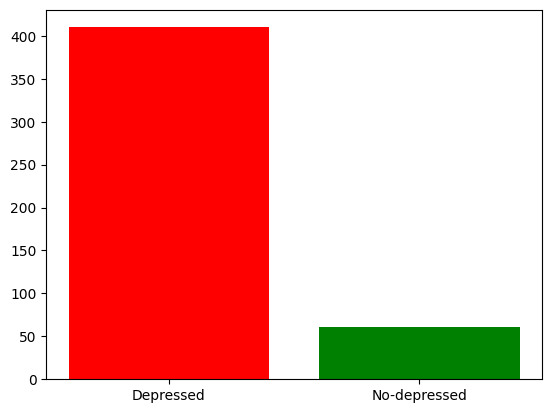

In [53]:
plt.bar(left, count, tick_label = ["Depressed", "No-depressed"],
        width = 0.8, color = ['red', 'green'])